<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>

# Blending and Pasting Images

For some computer vision systems, we'll want to be able to post our own image on top of an already existing image or video. We may also want to blend images, maybe we want to have a "highlight" effect instead of just a solid box or empty rectangle.

Let's explore what is commonly known as **Arithmetic Image Operations** with OpenCV. These are referred to as Arithmetic Operations because OpenCV is simply performing some common math with the pixels for the final effect. We'll see a bit of this in our code.

## Blending Images

Blending Images is actually quite simple, let's look at a simple example.

In [1]:
import cv2

In [9]:
# Two images
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')

In [10]:
img1.shape

(1401, 934, 3)

In [11]:
img2.shape

(1280, 1277, 3)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

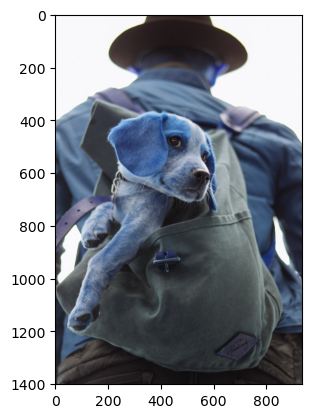

In [13]:
plt.imshow(img1)

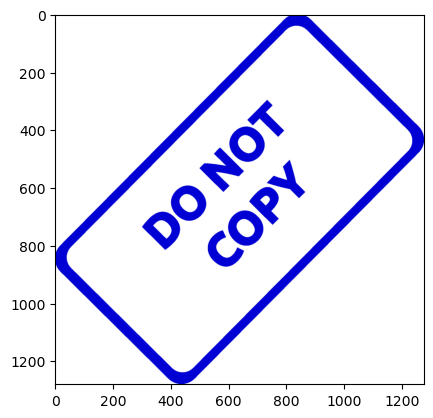

In [14]:
plt.imshow(img2)

Whoops! Let's remember to fix the RGB!

In [15]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

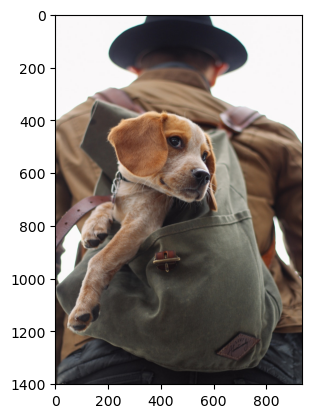

In [16]:
plt.imshow(img1)

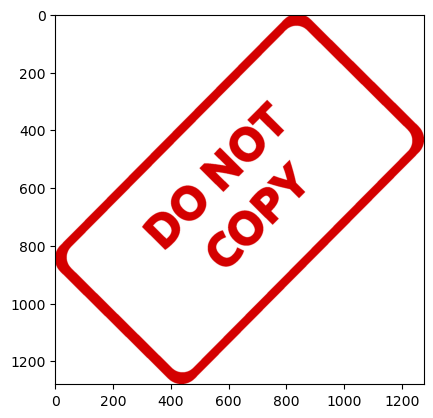

In [17]:
plt.imshow(img2)

### Resizing the Images

In [18]:
img1 =cv2.resize(img1,(1200,1200))
img2 =cv2.resize(img2,(1200,1200))

Let's practice resizing the image, since the DO NOT COPY image is actually quite large 1200 by 1200, and our puppy in backpack image is 1400 by 1000

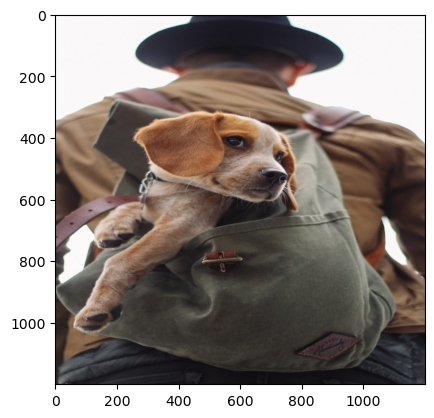

In [19]:
plt.imshow(img1)

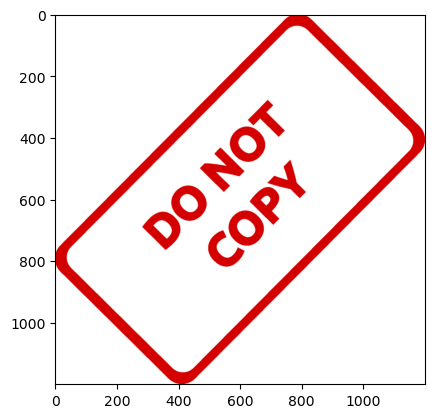

In [20]:
plt.imshow(img2)

### Blending the Image

We will blend the values together with the formula:

$$  img1 * \alpha  + img2 * \beta  + \gamma $$

In [21]:
img1.shape

(1200, 1200, 3)

In [22]:
img2.shape

(1200, 1200, 3)

In [23]:
blended = cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=0)

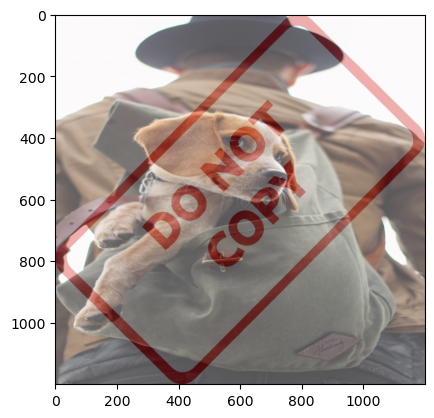

In [24]:
plt.imshow(blended)

-----

## Overlaying Images of Different Sizes

We can use this quick trick to quickly overlap different sized images, by simply reassigning the larger image's values to match the smaller image.

In [25]:
# Load two images
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

large_img = img1
small_img = img2

In [26]:
x_offset=0
y_offset=0

In [27]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

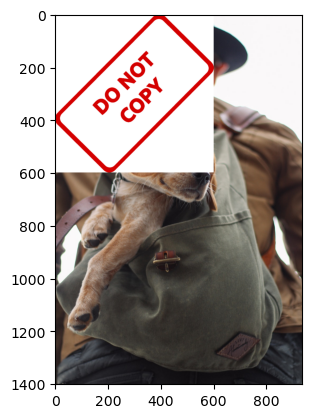

In [28]:
plt.imshow(large_img)

________
_______

## Blending Images of Different Sizes

### Imports

In [29]:
import numpy as np
import cv2

### Importing the images again and resizing

In [30]:
# Load two images
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

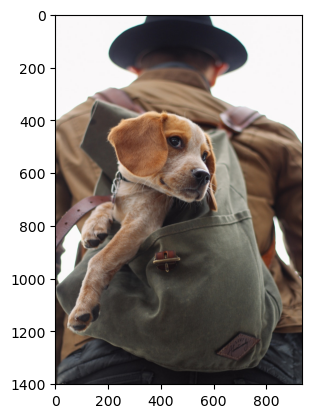

In [31]:
plt.imshow(img1)

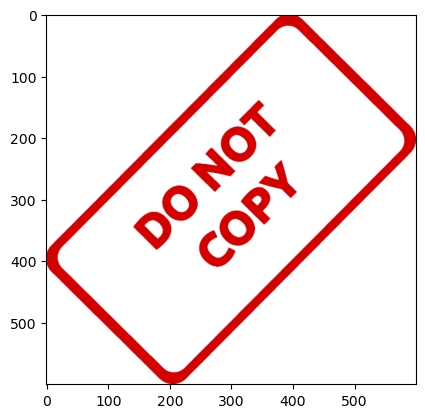

In [32]:
plt.imshow(img2)

### Create a Region of Interest (ROI)

In [33]:
img1.shape

(1401, 934, 3)

In [34]:
x_offset=934-600
y_offset=1401-600

In [35]:
# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows,cols,channels = img2.shape
# roi = img1[0:rows, 0:cols ] # TOP LEFT CORNER
roi = img1[y_offset:1401,x_offset:943] # BOTTOM RIGHT CORNER

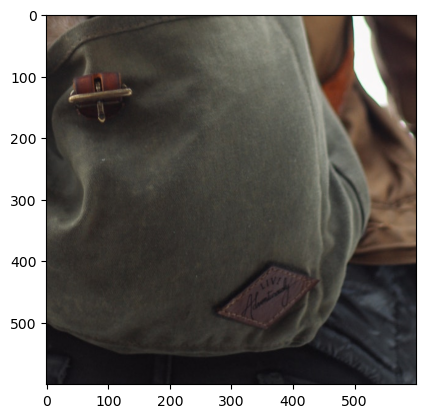

In [36]:
plt.imshow(roi)

In [37]:
roi.shape

(600, 600, 3)

### Creating a Mask

In [41]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [42]:
img2gray.shape

(600, 600)

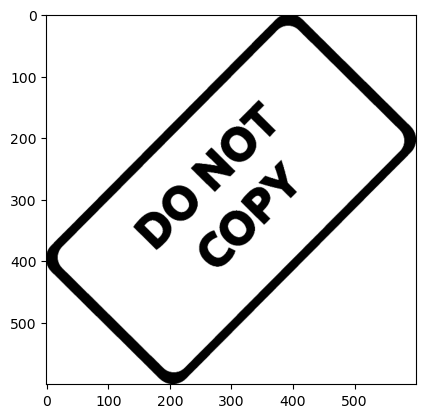

In [44]:
plt.imshow(img2gray,cmap='gray')

In [45]:
mask_inv = cv2.bitwise_not(img2gray)

In [46]:
mask_inv.shape

(600, 600)

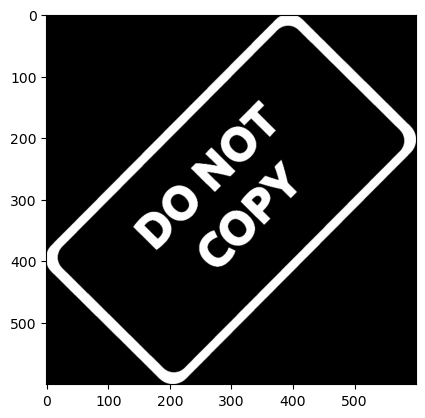

In [47]:
plt.imshow(mask_inv,cmap='gray')

## Convert Mask to have 3 channels

In [48]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [49]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [50]:
bk.shape

(600, 600, 3)

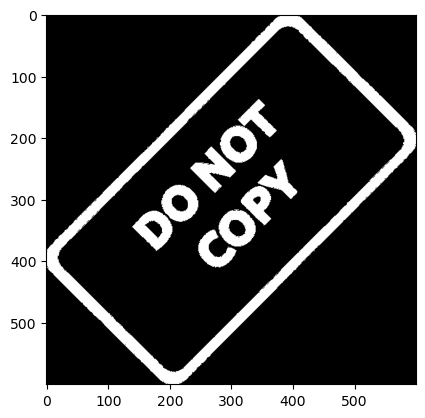

In [51]:
plt.imshow(bk)

### Grab Original FG image and place on top of Mask

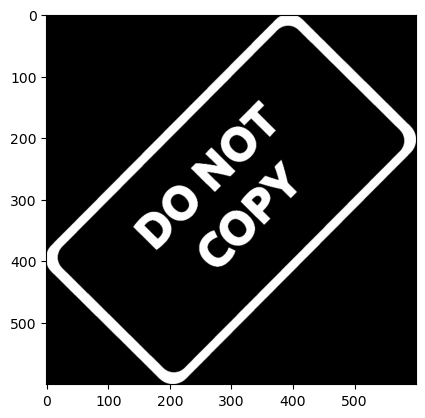

In [52]:
plt.imshow(mask_inv,cmap='gray')

In [53]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

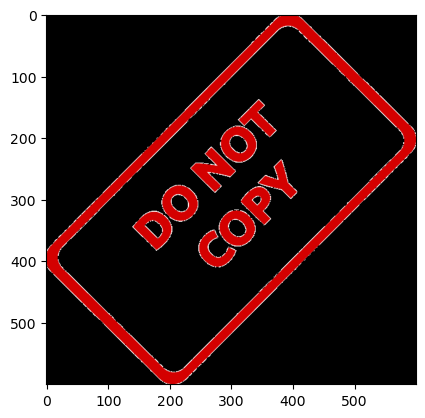

In [54]:
plt.imshow(fg)

In [55]:
fg.shape

(600, 600, 3)

### Get ROI and blend in the mask with the ROI

In [56]:
final_roi = cv2.bitwise_or(roi,fg)

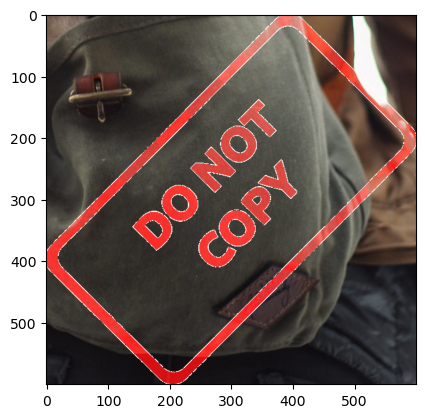

In [57]:
plt.imshow(final_roi)

### Now add in the rest of the image

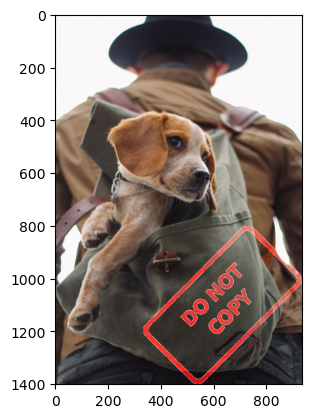

In [58]:
large_img = img1
small_img = final_roi


large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)

### Great Work!

Check out these documentation examples and links for more help for these kinds of tasks (which can be really tricky!)

1. https://stackoverflow.com/questions/10469235/opencv-apply-mask-to-a-color-image/38493075
2. https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv
3. https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html